# <span style='color:purple'> PROJECT: SALES PREDICTION

### Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [27]:
sales = pd.read_csv("D:\\python\\Dataset\\Sales Dataset.csv")

head() shows the first five rows of each column.

In [28]:
sales.head()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100


shape show the number of rows and column in the dataset

In [29]:
sales.shape

(1000, 8)

isna() shows the null valus in the dataset.

In [30]:
sales.isna().sum()

Unnamed: 0          0
Date                0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

## <span style='color:GREEN'> EDA (Exploratory Data Analysis)

Graph to show the Effect of Price per unit on Product category.

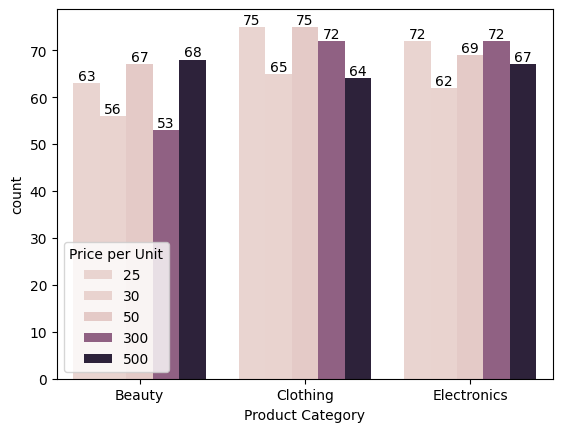

In [31]:
ax = sns.countplot(data=sales, x="Product Category", hue='Price per Unit')
for bars in ax.containers:
    ax.bar_label(bars)

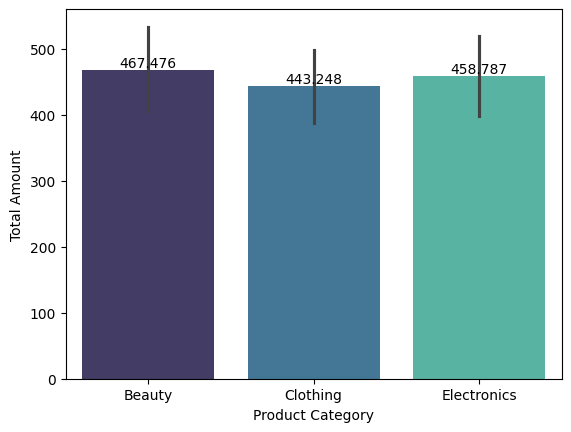

In [32]:
ax = sns.barplot(data = sales, x='Product Category', y='Total Amount', palette='mako')
for bar in ax.containers:
    ax.bar_label(bar)

Graph to show the effect of price per unit on Quantity

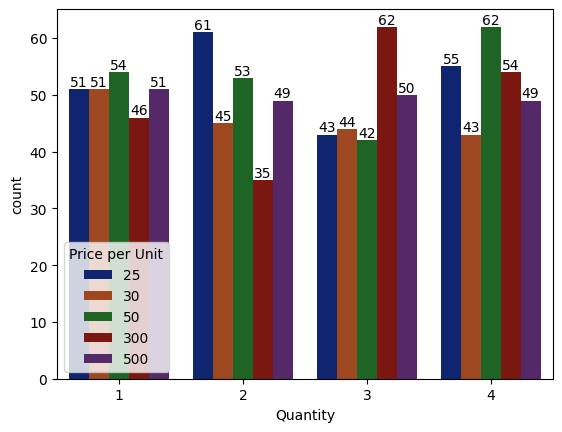

In [33]:
ax = sns.countplot(data=sales,  x='Quantity', hue='Price per Unit', palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)

In [34]:
sales['Product Category'] = sales['Product Category'].replace(['Beauty', 'Clothing','Electronics'],[0,1,2])

In [35]:
X=sales[['Product Category','Quantity', 'Price per Unit']]
y = sales['Total Amount']

# <span style='color:SKYBLUE'> Predicting Model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, f1_score

Dividing the dataset into training and testing.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <span style='color:red'> Linear Regression

In [38]:
LR = LinearRegression()

In [39]:
LR.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = LR.predict(X_test)

In [41]:
r2_score(y_test, y_pred)

0.856965397706587

$r^2$ score in Linear Regression  ->  85%

### <span style='color:red'> Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
RFR = RandomForestRegressor()


In [44]:
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
y_p = RFR.predict(X_test)

In [46]:
r2_score(y_test,y_p)

1.0

$r^2$ score by KNeighboursRegressor -> 100%

### <span style='color:red'> K-Neighbours Regressor

In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
KNN = KNeighborsRegressor(42)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

In [49]:
r2_score(y_test, KNN_pred)

0.9841535242265818

$r^2$ score by KNeighboursRegressor -> 98%

In [50]:
import pickle
pickle.dump(KNN,open('model.pkl','wb'))

In [53]:
for i in X_train:
    print(X_train[i][1])

1
2
500
